# Cluster Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [2]:
def load_data(train, test, fname) :
    fpath = "trained_models/{}/eval/{}/{}.txt".format(train, test, fname)
    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original")
y_original_pred = load_data(train, test, "Y_original_pred")
y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

In [3]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [5 8 8 ... 5 1 7]


In [4]:
train = "fgsm"
test = "autopgd"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(fgsm,autopgd): [3 8 8 ... 5 1 7]
Y_adv_pred(fgsm,autopgd): [3 8 8 ... 5 1 7]


In [5]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

attack_to_id = {}
id_to_attack = {}
for i in range(len(attacks)) :
    attack_to_id[attacks[i]] = i
    id_to_attack[i] = attacks[i]

In [6]:
predictions = {}
labels = {}

for a1 in attacks :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = p
    labels[a1] = l

In [7]:
predictions

{'autoattack': array([5., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 3., 1., 5.]),
 'bim': array([3., 8., 8., ..., 6., 1., 7.]),
 'cw': array([3., 8., 8., ..., 6., 1., 6.]),
 'fgsm': array([3., 8., 8., ..., 3., 1., 3.]),
 'pgd': array([5., 8., 8., ..., 3., 1., 3.]),
 'deepfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'newtonfool': array([3., 8., 8., ..., 3., 1., 3.]),
 'squareattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'pixelattack': array([3., 3., 3., ..., 3., 3., 3.]),
 'spatialtransformation': array([6., 8., 0., ..., 5., 1., 7.])}

In [8]:
labels

{'autoattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'bim': array([3., 8., 8., ..., 5., 1., 7.]),
 'cw': array([3., 8., 8., ..., 5., 1., 7.]),
 'fgsm': array([3., 8., 8., ..., 5., 1., 7.]),
 'pgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'deepfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'newtonfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'squareattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'pixelattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'spatialtransformation': array([3., 8., 8., ..., 5., 1., 7.])}

In [9]:
# compare the labels with the predictions

accuracies = []
for a in attacks :
    accuracies.append(np.equal(predictions[a], labels[a]))
accuracies

[array([False,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ..., False,  True, False]),
 array([ True,  True,  True, ..., False,  True,  True]),
 array([ True,  True,  True, ..., False,  True, False]),
 array([ True,  True,  True, ..., False,  True, False]),
 array([False,  True,  True, ..., False,  True, False]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ..., False,  True, False]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True, False, False, ..., False, False, False]),
 array([False,  True, False, ...,  True,  True,  True])]

In [10]:
accs = []
for a in attacks :
    tr = (labels[a] == predictions[a]).sum().item()
    accs.append(tr / len(labels[a]))
    
accs = pd.DataFrame(data={"attack": attacks, "accuracy": accs})
accs

,attack,accuracy
0,autoattack,0.687618
1,autopgd,0.679955
2,bim,0.684900
3,cw,0.691845
4,fgsm,0.683045
5,pgd,0.679227
6,deepfool,0.684036
7,newtonfool,0.685736
8,squareattack,0.661755
9,pixelattack,0.163509


In [11]:
sorted_acc = accs.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
sorted_acc

,attack,accuracy
0,cw,0.691845
1,autoattack,0.687618
2,newtonfool,0.685736
3,bim,0.684900
4,deepfool,0.684036
5,fgsm,0.683045
6,autopgd,0.679955
7,pgd,0.679227
8,squareattack,0.661755
9,spatialtransformation,0.512345


In [12]:
# measure cosine simmilarity
def cosine_simmilarity(l1, l2):
    return 1 - distance.cosine(l1, l2)

# selected_attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack"] 
selected_attacks = attacks

sim = {}
for a1 in selected_attacks :
    s = {}
    for a2 in selected_attacks :
        acc1 = np.equal(predictions[a1], labels[a1])
        acc2 = np.equal(predictions[a2], labels[a2])   
        s[a2] = cosine_simmilarity(acc1, acc2)
#         s[a2] = cosine_simmilarity(predictions[a1], predictions[a2])
    sim[a1] = s

sim = pd.DataFrame(data=sim)
sim

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation
autoattack,1.000000,0.890457,0.886653,0.889428,0.890204,0.882367,0.889374,0.895314,0.869183,0.190083,0.697839
autopgd,0.890457,1.000000,0.889944,0.890807,0.887603,0.882135,0.886693,0.895885,0.870842,0.188561,0.695106
bim,0.886653,0.889944,1.000000,0.892987,0.886267,0.884809,0.894191,0.899423,0.876969,0.189291,0.693129
cw,0.889428,0.890807,0.892987,1.000000,0.893087,0.887093,0.904743,0.897906,0.879502,0.183041,0.696360
fgsm,0.890204,0.887603,0.886267,0.893087,1.000000,0.879817,0.897227,0.890429,0.866111,0.194662,0.687462
pgd,0.882367,0.882135,0.884809,0.887093,0.879817,1.000000,0.887795,0.887653,0.861965,0.198209,0.687835
deepfool,0.889374,0.886693,0.894191,0.904743,0.897227,0.887795,1.000000,0.895597,0.870375,0.178837,0.694227
newtonfool,0.895314,0.895885,0.899423,0.897906,0.890429,0.887653,0.895597,1.000000,0.886421,0.181574,0.692630
squareattack,0.869183,0.870842,0.876969,0.879502,0.866111,0.861965,0.870375,0.886421,1.000000,0.180800,0.686614
pixelattack,0.190083,0.188561,0.189291,0.183041,0.194662,0.198209,0.178837,0.181574,0.180800,1.000000,0.170865


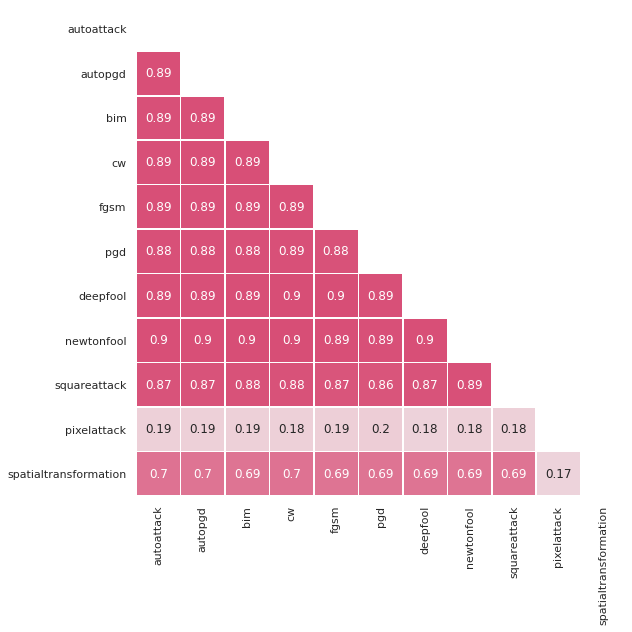

In [13]:
def plot_half_heatmap(data, cmap, path) :
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    f = sns.heatmap(data, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar=False, annot=True)
    f.figure.savefig(path, bbox_inches='tight')


# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)

path = "plot/rq1-sim.png"

plot_half_heatmap(sim, cmap, path)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


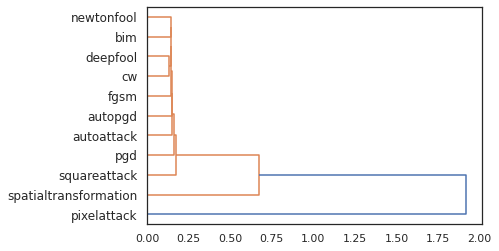

In [14]:
import scipy.cluster.hierarchy as hcluster
linkage = hcluster.linkage(1-sim)
dendro_label = selected_attacks
# dendro_label = sim.columns
dendro  = hcluster.dendrogram(linkage, labels=dendro_label, orientation="right")

In [16]:
# cluster = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack"]
# cluster = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack"]
# cluster = ["autoattack", "autopgd", "bim", "pgd"]
cluster = ["pixelattack", "spatialtransformation"]

def get_centroid(cluster, sim) :
    val = {}
    for c in cluster :
        val[c] = 0
        for c2 in cluster :
            val[c] += sim[c][c2]
    max_dist = val[cluster[0]]
    idx = cluster[0]
    for c in cluster :
#         print(c, ": ", val[c])
        if val[c] > max_dist :
            max_dist = val[c]
            idx = c
    return idx
            
get_centroid(cluster, sim)

'pixelattack'

## Try Clustering on Original Features

In [17]:
## Example from
# https://stackoverflow.com/questions/53194672/sklearn-dbscan-cosine-vs-precomputed

from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy import sparse

def cluster(X, metric="cosine"):
    cluster = DBSCAN(
        eps=0.5,
        min_samples=3,
        metric=metric,
        algorithm="brute"
    )

    cluster.fit_predict(X)

    return cluster

sentences = [
    "annuler ma commande",
    "commande à annuler",
    "merci de bien vouloir annuler ma commande",
    "produits cassés",
    "mes produits sont cassés",
    "ma commande de produits cassés"
]

vectorizer = TfidfVectorizer()
tfidfs = vectorizer.fit_transform(sentences)
distance_matrix = pairwise_distances(tfidfs, tfidfs, metric='cosine')

doc_id_to_cluster_1 = cluster(tfidfs, "cosine").labels_
doc_id_to_cluster_2 = cluster(sparse.csr_matrix(distance_matrix), "precomputed").labels_

print(doc_id_to_cluster_1)
print(doc_id_to_cluster_2)

[0 0 0 1 1 1]
[0 0 0 1 1 1]


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


In [18]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

def cluster(X, metric="cosine"):
    cluster = DBSCAN(
        eps=0.2,
        min_samples=1,
        metric=metric,
        algorithm="brute"
    )

    cluster.fit_predict(X)

    return cluster

labels = cluster(1-sim, "precomputed").labels_

print("Label :", labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 1 2]
Silhouette Coefficient: 0.627


In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(affinity="precomputed", linkage='average')
labels = cluster.fit_predict(1-sim)

print("Label :", labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.798


In [20]:
from sklearn.cluster import AffinityPropagation

cluster = AffinityPropagation(affinity="precomputed")
labels = cluster.fit_predict(1-sim)

print("Label :", labels)
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


In [21]:
def get_cluster(labels, attacks) :
    cls = {}
    for l, a in zip(labels, attacks) :
        if l not in cls.keys() :
            cls[l] = []
        cls[l].append(a)
    return cls

get_cluster(labels, attacks)

{0: ['autoattack',
  'autopgd',
  'bim',
  'cw',
  'fgsm',
  'pgd',
  'deepfool',
  'newtonfool',
  'squareattack',
  'pixelattack',
  'spatialtransformation']}

In [22]:
def get_centroids(clusters) :
    cs = {}
    for k in clusters.keys() :
        cs[k] = get_centroid(clusters[k], sim)
    return cs

get_centroids(get_cluster(labels, sim))

{0: 'newtonfool'}

In [23]:
from sklearn.cluster import KMeans

for i in range(2, 10) :
    kmeans = KMeans(n_clusters=i, random_state=0).fit(accuracies)
    labels = kmeans.labels_
    print()
    print("N cluster : ", i)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(accuracies, labels))
    print("Label : ", labels)
    print("Cluster : ", get_cluster(labels, attacks))
    centroids = get_centroids(get_cluster(labels, attacks))
    print("Centroid : ", centroids)
    comb_str = ""
    for j in range(i) :
        comb_str += centroids[j]
        if j != i-1 :
            comb_str += "_"
        
    print("Combined: ", comb_str)


N cluster :  2
Silhouette Coefficient: 0.433
Label :  [0 0 0 0 0 0 0 0 0 1 0]
Cluster :  {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack', 'spatialtransformation'], 1: ['pixelattack']}
Centroid :  {0: 'newtonfool', 1: 'pixelattack'}
Combined:  newtonfool_pixelattack

N cluster :  3
Silhouette Coefficient: 0.294
Label :  [0 0 0 0 0 0 0 0 0 1 2]
Cluster :  {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}
Centroid :  {0: 'newtonfool', 1: 'pixelattack', 2: 'spatialtransformation'}
Combined:  newtonfool_pixelattack_spatialtransformation

N cluster :  4
Silhouette Coefficient: 0.047
Label :  [0 0 0 0 0 0 0 0 2 1 3]
Cluster :  {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool'], 2: ['squareattack'], 1: ['pixelattack'], 3: ['spatialtransformation']}
Centroid :  {0: 'newtonfool', 2: 'squareattack', 1: 'pixelattac

## Elbow score
Source: https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

Text(0, 0.5, 'Inertia')

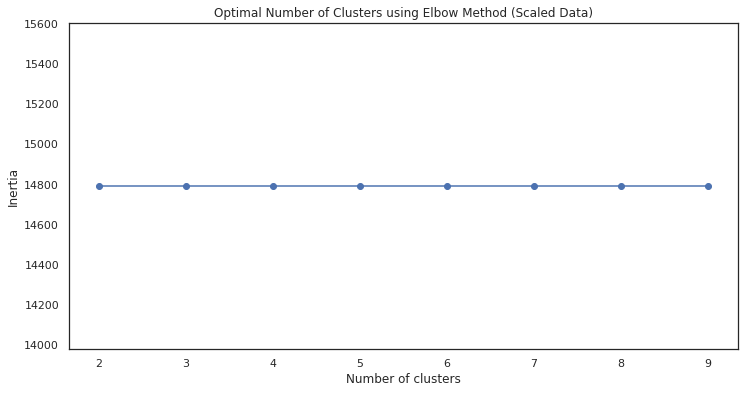

In [24]:
sse = []
k_list = range(2, 10)
for k in k_list :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(accuracies)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': k_list, 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
from sklearn.cluster import AgglomerativeClustering

for i in range(2, 10) :
    cluster = AgglomerativeClustering(n_clusters=i, affinity="manhattan", linkage="average").fit(accuracies)
    labels = cluster.labels_
    print()
    print("N cluster : ", i)
    print("Label : ", labels)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(accuracies, labels))


N cluster :  2
Label :  [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.433

N cluster :  3
Label :  [0 0 0 0 0 0 0 0 0 1 2]
Silhouette Coefficient: 0.294

N cluster :  4
Label :  [0 0 0 0 0 0 0 0 3 1 2]
Silhouette Coefficient: 0.047

N cluster :  5
Label :  [0 0 0 0 0 4 0 0 3 1 2]
Silhouette Coefficient: 0.021

N cluster :  6
Label :  [5 0 0 0 0 4 0 0 3 1 2]
Silhouette Coefficient: 0.009

N cluster :  7
Label :  [5 0 0 2 2 4 2 0 3 1 6]
Silhouette Coefficient: 0.012

N cluster :  8
Label :  [5 7 2 0 0 4 0 2 3 1 6]
Silhouette Coefficient: 0.011

N cluster :  9
Label :  [5 7 0 2 8 4 2 0 3 1 6]
Silhouette Coefficient: 0.011


### Dimensionality Reduction using PCA
source: https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [29]:
from sklearn.decomposition import PCA

n_components = 2
columns = ["pc" + str(i) for i in range(n_components)]
pca = PCA(n_components=n_components)
pca_scale = pca.fit_transform(accuracies)
pca_df_scale = pd.DataFrame(pca_scale, columns=columns)
print(pca.explained_variance_ratio_)

[0.42752106 0.1482201 ]


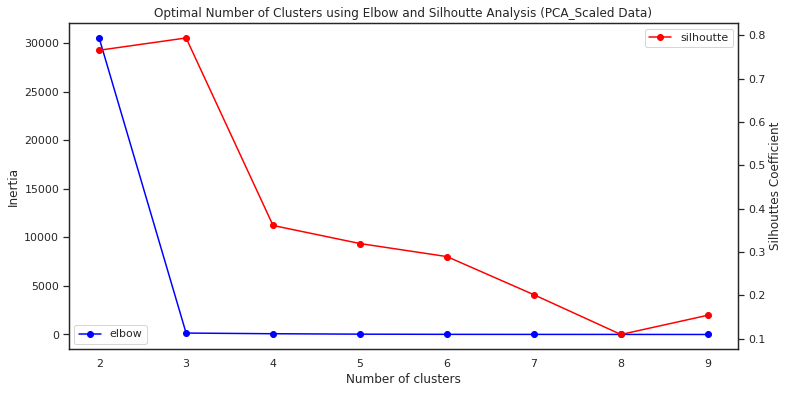

In [61]:
sse = []
silhouttes = []
k_list = range(2, 10)
for k in k_list:
    km = KMeans(n_clusters=k,  n_init=1, max_iter=500, init='k-means++', random_state=42)
    km.fit(pca_df_scale)
    labels = km.labels_
    sse.append([k, km.inertia_])
#     print("N cluster : ", k)
    silhoutte = metrics.silhouette_score(pca_df_scale, labels)
#     print("Silhouette Coefficient: %0.3f" % silhoutte)
    silhouttes.append([k, silhoutte])
    
pca_results_scale = pd.DataFrame({'Cluster': k_list, 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o', color="blue", label="elbow")
plt.title('Optimal Number of Clusters using Elbow and Silhoutte Analysis (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='lower left')
plt.twinx()
plt.plot(pd.DataFrame(silhouttes)[0], pd.DataFrame(silhouttes)[1], marker='o', color='red', label="silhoutte")
plt.ylabel('Silhouttes Coefficient')
f = plt.legend(loc='upper right')

path = "plot/awp-cluster-analysis.png"
f.figure.savefig(path, bbox_inches='tight')

In [55]:
from sklearn.metrics import pairwise_distances_argmin_min

n_cluster = 3
kmeans_pca_scale = KMeans(n_clusters=n_cluster, n_init=1, max_iter=500, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
print("Cluster : ", get_cluster(labels_pca_scale, attacks))
cluster_centers = kmeans_pca_scale.cluster_centers_
closest_id, _ = pairwise_distances_argmin_min(cluster_centers, pca_df_scale)
closest = []
for i in closest_id :
    closest.append(id_to_attack[i])
print("Centroid : ", closest)
print("_".join(closest))


clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.7938551533056661
Cluster :  {1: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 0: ['pixelattack'], 2: ['spatialtransformation']}
Centroid :  ['pixelattack', 'bim', 'spatialtransformation']
pixelattack_bim_spatialtransformation


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


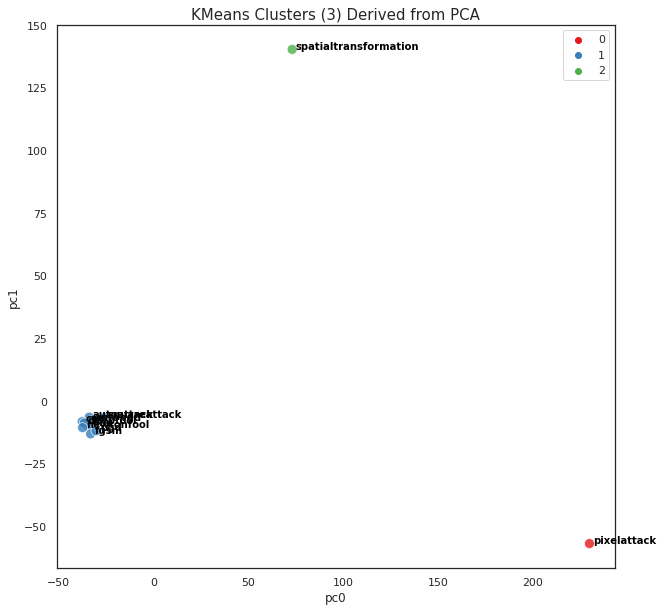

In [62]:
plt.figure(figsize = (10,10))
p1 = sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.8)
p1.set_title('KMeans Clusters ({}) Derived from PCA'.format(n_cluster), fontsize=15)

for line in range(0,pca_df_scale.shape[0]):
     p1.text(pca_df_scale["pc0"][line]+2, pca_df_scale["pc1"][line], 
         attacks[line], horizontalalignment='left', 
         size='small', color='black', weight='semibold')
f = plt.legend()
plt.show()

path = "plot/awp-cluster-result.png"
f.figure.savefig(path, bbox_inches='tight')